In [6]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("c:/Users/roaam/Downloads/cv(2).jpg")
if image is None:
    print("Error: Image not found.")
    exit()

# Resize image to width 800 while keeping aspect ratio
width = 800
height = int(image.shape[0] * (800 / image.shape[1]))
resized_image = cv2.resize(image, (width, height))

# Apply Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(resized_image, (3, 3), 0)

# Convert to grayscale
gray = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)

# Initialize HOG descriptor and set SVM detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Detect people
(rects, weights) = hog.detectMultiScale(gray, winStride=(8, 8), padding=(8, 8), scale=1.05)

# Convert to the format required by NMS
boxes = []
for (x, y, w, h) in rects:
    boxes.append([x, y, x + w, y + h])  # from (x, y, w, h) to (x1, y1, x2, y2)

# Apply Non-Maximum Suppression
indices = cv2.dnn.NMSBoxes(boxes, weights.flatten().tolist(), score_threshold=0.9, nms_threshold=0.9)

# Draw filtered bounding boxes
for i in indices:
    i = i[0] if isinstance(i, (tuple, list, np.ndarray)) else i
    (x1, y1, x2, y2) = boxes[i]
    cv2.rectangle(resized_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Show result
cv2.imshow("HOG Person Detection with NMS", resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# import library

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image

In [8]:
image = cv2.imread("C:/Users/roaam/OneDrive/Desktop/cv.jpg")
if image is None:
    print("Error: Image not found.")
    exit()

# Resize image 

In [ ]:

width = 800
height = int(image.shape[0] * (800 / image.shape[1])) 
resized_image = cv2.resize(image, (width, height))

# Blur to reduce noise

![Gaussian Blur](images/1b.jpg)
![Gaussian Blur](images/2b.jpg)
![Gaussian Blur](images/3b.jpg)

In [10]:

blurred_image = cv2.GaussianBlur(resized_image, (3, 3), 0)

#  Convert to grayscale

In [11]:
gray = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)


# Initialize HOG descriptor and set SVM detector

In [12]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
(rects, weights) = hog.detectMultiScale(gray, winStride=(3,3), padding=(8, 8), scale=1.05)

# Resize to 64×128
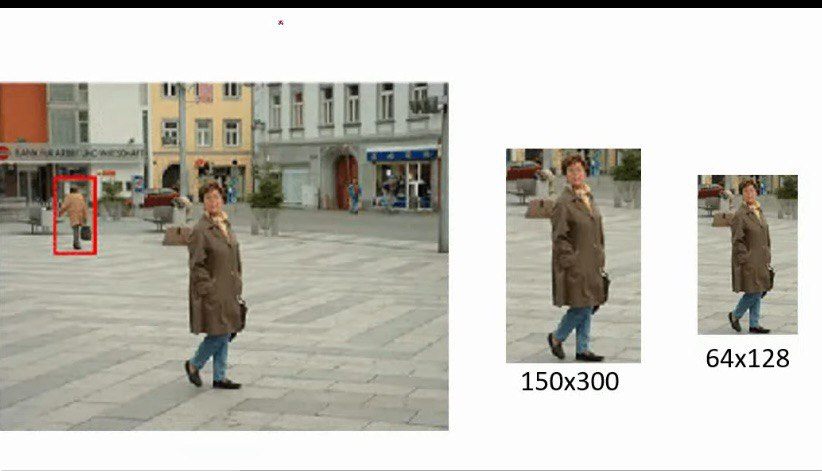

# Create Cells, and Blocks
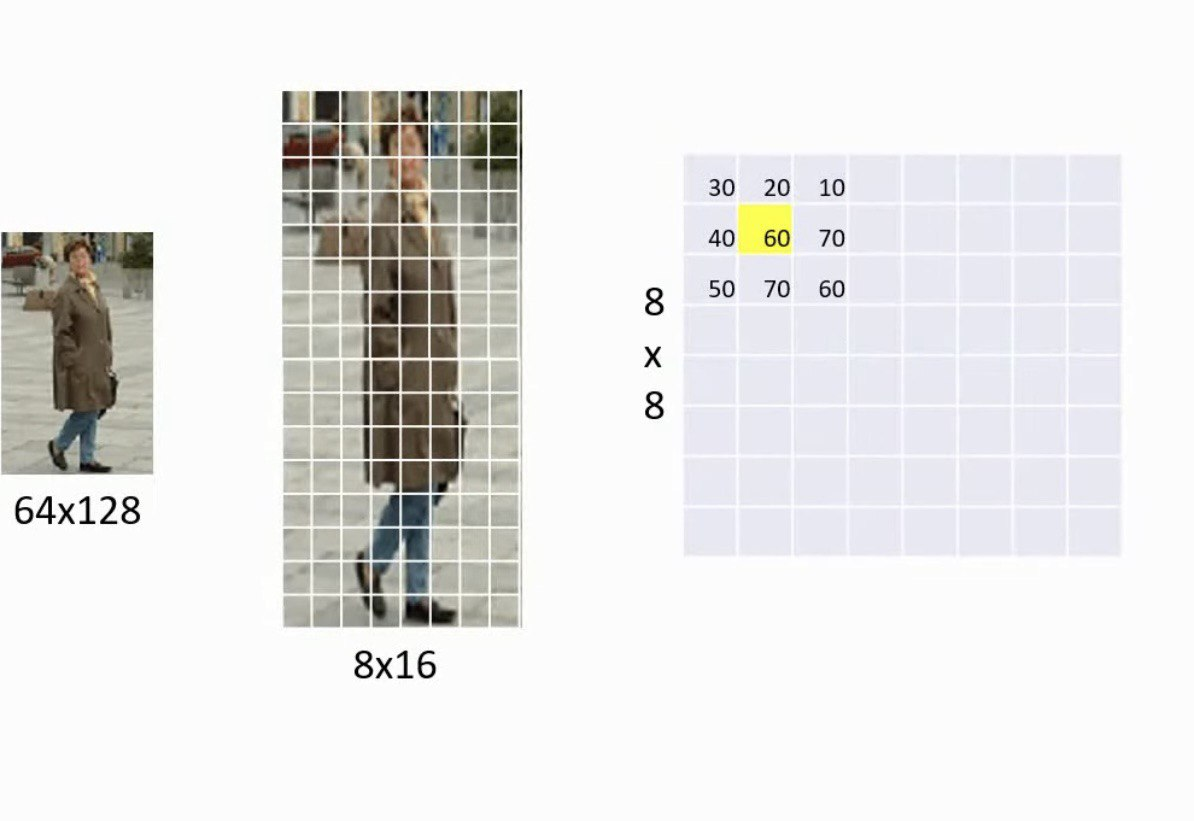

# Calculate the Gradients
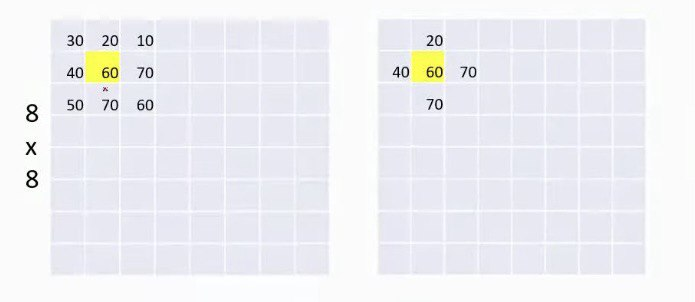
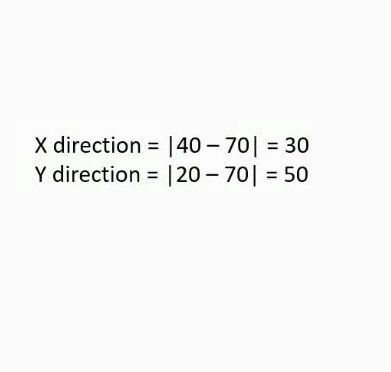


# Calculate the magnitude, and orientations
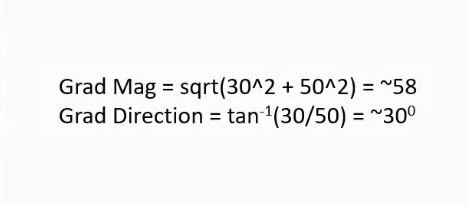


# Create the histogram of 9 bins
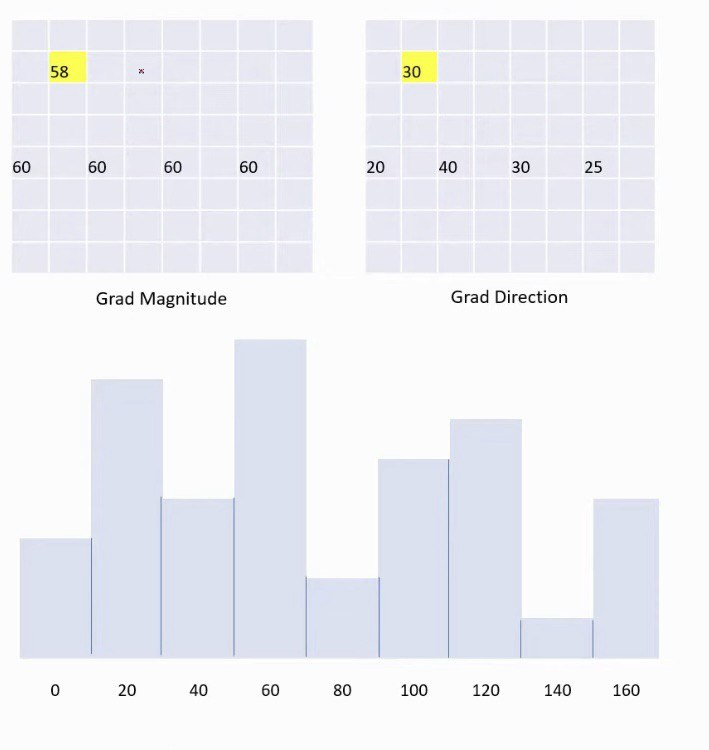



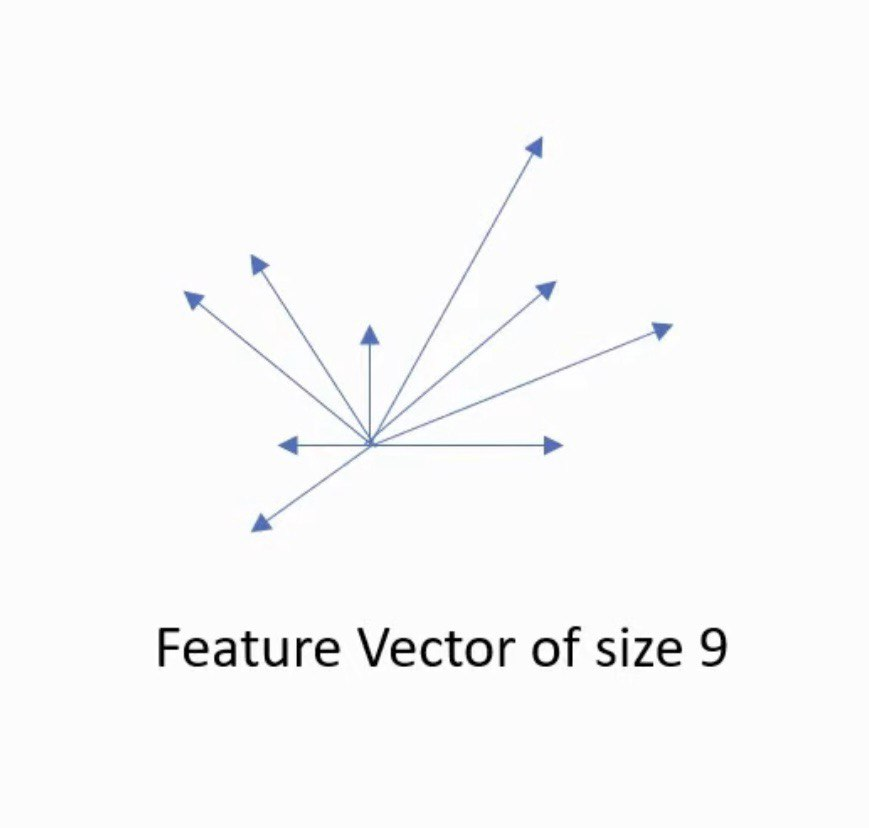

# create blocks
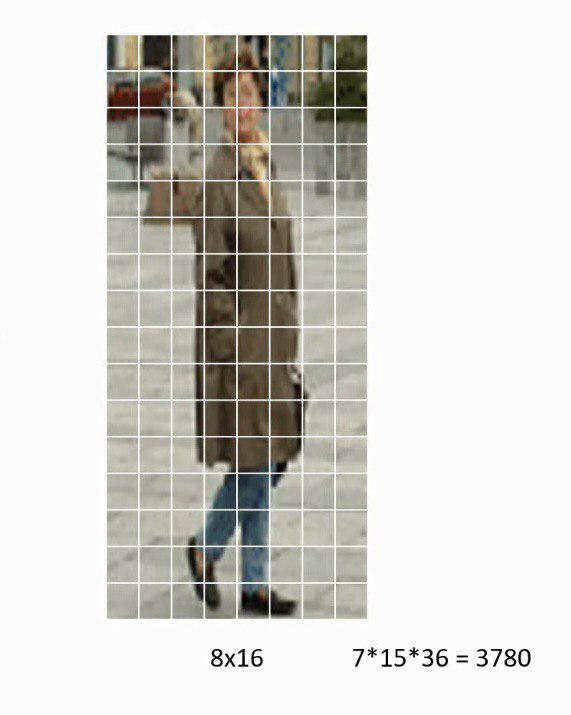
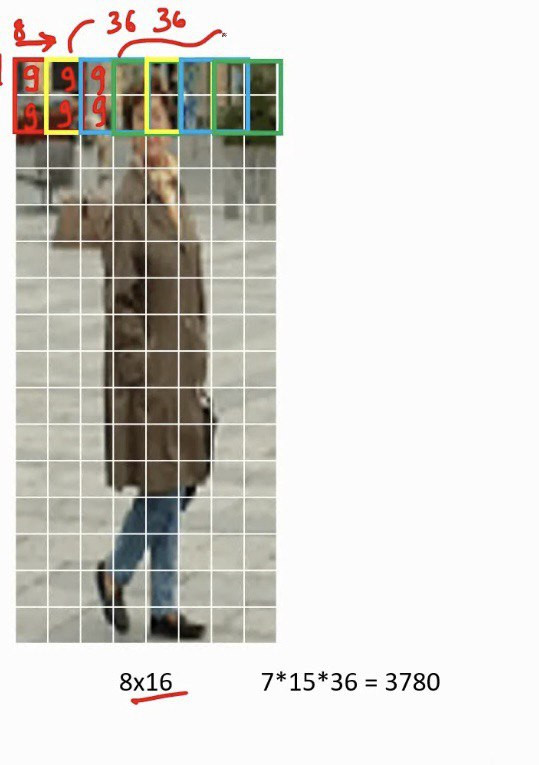

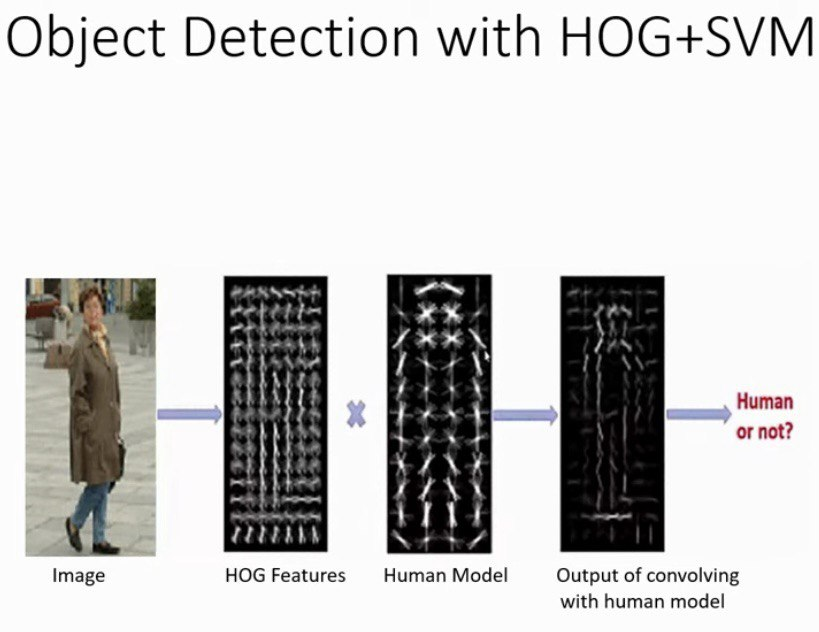

# normalization

Why do we apply Normalization?\
 • To improve model accuracy.\
 • To reduce the impact of lighting differences across images.\
 • So the model focuses on the pattern/structure of the object:\
 • Edges\
 • Lines\
 • Orientations\
 • And ignores lighting intensity differences.

Simple Example:\
 • Suppose I have two images of the same person:\
 • One taken in bright light.\
 • One taken in dim light.\
 • The pixel directions (gradients) are similar.\
 • But the pixel values differ:\
 • Bright image = pixel values are multiplied.\
 • Dim image = pixel values are divided.\
 • Without normalization, HOG thinks they’re different images just because the numbers vary.


How do we perform Normalization?
 1. Each Block contains 4 Cells (2×2).
 2. Each Cell produces 9 features.
 3. So, each Block has a 36-value Feature Vector.
 4. We calculate the L2-norm of that vector:

![l norm.jpg](<attachment:l norm.jpg>)


5. Then divide each value by the norm → this gives a normalized vector.
 6. Repeat the process for every Block.
 7. Finally: concatenate all the normalized vectors → this is the final feature representation of the image.

 # example
 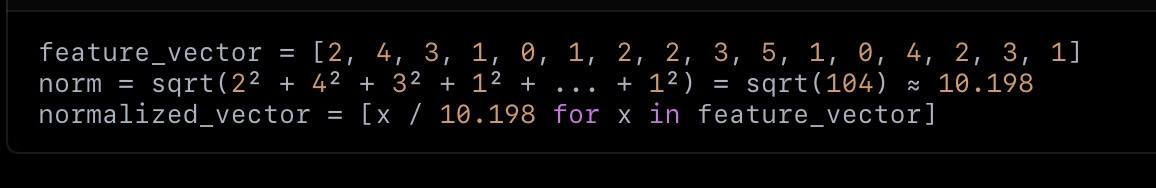

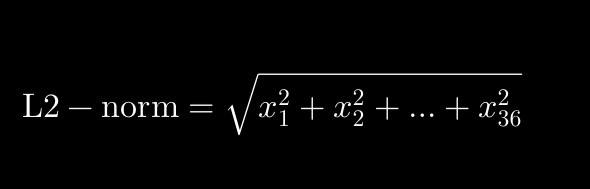

# Apply Non-Maximum Suppression

In [ ]:
boxes = []
for (x, y, w, h) in rects:  
    boxes.append([x, y, x + w, y + h])  

confidences = [float(w) for w in weights]
indices = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.6, nms_threshold=0.9)

# Draw filtered bounding boxes

In [1]:
for i in indices:
    i = i[0] if isinstance(i, (tuple, list, np.ndarray)) else i
    (x1, y1, x2, y2) = boxes[i]
    cv2.rectangle(resized_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

#   

NameError: name 'indices' is not defined

In [ ]:
# Show result

In [15]:

cv2.imshow("HOG Person Detection with NMS", resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#  Show 9 bins for first HOG cell 

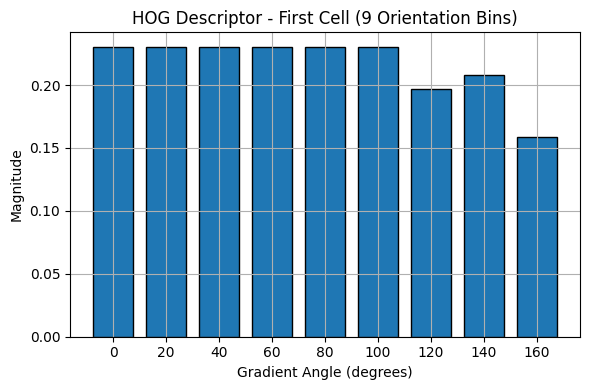

In [20]:
# Resize gray image to be divisible by 8
gray_resized = cv2.resize(gray, (gray.shape[1] // 8 * 8, gray.shape[0] // 8 * 8))

# Define HOG descriptor for visualization
hog_vis = cv2.HOGDescriptor(
    _winSize=(gray_resized.shape[1], gray_resized.shape[0]),
    _blockSize=(16, 16),
    _blockStride=(8, 8),
    _cellSize=(8, 8),
    _nbins=9
)

hog_features = hog_vis.compute(gray_resized)

# Plot first cell (first 9 values)
first_cell = hog_features[:9].flatten()
bins = np.arange(0, 180, 20)

plt.figure(figsize=(6, 4))
plt.bar(bins, first_cell, width=15, align='center', edgecolor='black')
plt.xticks(bins)
plt.xlabel("Gradient Angle (degrees)")
plt.ylabel("Magnitude")
plt.title("HOG Descriptor - First Cell (9 Orientation Bins)")
plt.grid(True)
plt.tight_layout()
plt.show()



# Draw HOG gradient arrows 

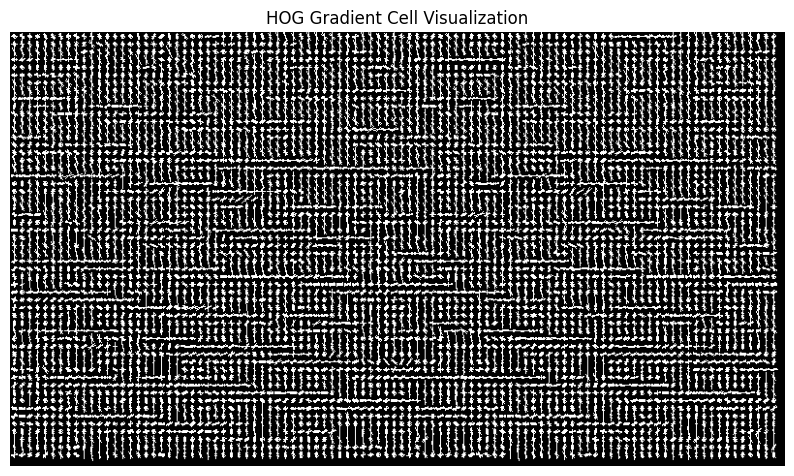

In [21]:

cell_size = 8
n_cells = (gray_resized.shape[0] // cell_size, gray_resized.shape[1] // cell_size)
hog_feats = hog_features.reshape(n_cells[0] - 1, n_cells[1] - 1, 4, 9).sum(axis=2)

angles = np.arange(0, 180, 20)
angles_rad = np.deg2rad(angles)

hog_image = np.zeros(gray_resized.shape, dtype=np.uint8)
cell_half = cell_size // 2

for y in range(hog_feats.shape[0]):
    for x in range(hog_feats.shape[1]):
        cell_grad = hog_feats[y, x]
        for bin_idx, magnitude in enumerate(cell_grad):
            angle = angles_rad[bin_idx]
            dx = int(magnitude * np.cos(angle) * cell_half)
            dy = int(magnitude * np.sin(angle) * cell_half)
            center_x = x * cell_size + cell_half
            center_y = y * cell_size + cell_half
            pt1 = (center_x - dx, center_y - dy)
            pt2 = (center_x + dx, center_y + dy)
            cv2.line(hog_image, pt1, pt2, 255, 1)

# Show HOG gradient arrows
plt.figure(figsize=(10, 8))
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Gradient Cell Visualization")
plt.axis("off")
plt.show()